# GitHub analysis client
This notebook assumes that Pulsar is running and there are already partial results available

In [18]:
import matplotlib.pyplot as plt
import operator
import os
import pandas as pd
import sortedcontainers
from pulsar_wrapper import PulsarConnection

In [19]:
class LanguageTuple(object):
    """ Data Type to support tuple in-place sorting using sortedcontainers """
    def __init__(self, lang_tuple):
        self.lang = lang_tuple[0]
        self.value = int(lang_tuple[1] or 0)
        
    def __repr__(self):
        return f"('{self.lang}', {self.value})"

def sort_results(language_stats, field, num_results=None):
    lang_repos = sortedcontainers.SortedKeyList(key=lambda x: -x.value)
    for language in language_stats:
        lang_repos.add(LanguageTuple((language, language_stats[language][field])))
    return list(lang_repos[:num_results])

In [20]:
# Function to plot the results
def plot_result(result_tuple, title='', xlabel='', ylabel=''):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)

    ax.set_ylabel(ylabel)
    ax.set_title(title)

    x_axis = [val.lang for val in result_tuple]
    y_axis = [val.value for val in result_tuple]
    plt.bar(range(len(result_tuple)), y_axis, tick_label=x_axis)
    plt.show()

In [21]:
# Take Pulsar host value from the environment variables
environment = os.environ
pulsar_host = environment.get("pulsar_host")
# If not set, assume its running in localhost
if (pulsar_host is None): pulsar_host = 'localhost'
my_pulsar = PulsarConnection(ip_address=pulsar_host)

2022-06-04 04:09:15.476 INFO  [139957752592192] ClientConnection:189 | [<none> -> pulsar://localhost:6650] Create ClientConnection, timeout=10000
2022-06-04 04:09:15.482 INFO  [139957752592192] ConnectionPool:96 | Created connection for pulsar://localhost:6650
2022-06-04 04:09:15.505 INFO  [139956788725504] ClientConnection:375 | [127.0.0.1:35230 -> 127.0.0.1:6650] Connected to broker
2022-06-04 04:09:15.509 INFO  [139956788725504] HandlerBase:64 | [persistent://public/static/initialized, reader-51db9187a7, 0] Getting connection from pool
2022-06-04 04:09:15.512 INFO  [139956788725504] ConsumerImpl:224 | [persistent://public/static/initialized, reader-51db9187a7, 0] Created consumer on broker [127.0.0.1:35230 -> 127.0.0.1:6650] 
Found 'Initializing' message
Found 'Initialized' message
2022-06-04 04:09:15.518 INFO  [139957752592192] ConsumerImpl:999 | [persistent://public/static/initialized, reader-51db9187a7, 0] Closing consumer for topic persistent://public/static/initialized
2022-06-

In [22]:
cur_cutoff_date = my_pulsar.get_current_cuttoff_date()

2022-06-04 04:09:19.167 INFO  [139956788725504] HandlerBase:64 | [persistent://public/static/initialized, reader-e9352cca2f, 1] Getting connection from pool
2022-06-04 04:09:19.170 INFO  [139956788725504] ConsumerImpl:224 | [persistent://public/static/initialized, reader-e9352cca2f, 1] Created consumer on broker [127.0.0.1:35230 -> 127.0.0.1:6650] 
2022-06-04 04:09:19.175 INFO  [139957752592192] ConsumerImpl:999 | [persistent://public/static/initialized, reader-e9352cca2f, 1] Closing consumer for topic persistent://public/static/initialized
2022-06-04 04:09:19.175 INFO  [139956788725504] ConsumerImpl:1055 | [persistent://public/static/initialized, reader-e9352cca2f, 1] Closed consumer 1


In [23]:
cur_cutoff_date

'2021-01-30'

In [24]:
my_pulsar.process_results(cutoff_date='2021-03-07')

2022-06-04 04:09:32.078 INFO  [139956788725504] HandlerBase:64 | [persistent://public/static/initialized, reader-2c317a4e70, 2] Getting connection from pool
2022-06-04 04:09:32.081 INFO  [139956788725504] ConsumerImpl:224 | [persistent://public/static/initialized, reader-2c317a4e70, 2] Created consumer on broker [127.0.0.1:35230 -> 127.0.0.1:6650] 
2022-06-04 04:09:32.085 INFO  [139957752592192] ConsumerImpl:999 | [persistent://public/static/initialized, reader-2c317a4e70, 2] Closing consumer for topic persistent://public/static/initialized
2022-06-04 04:09:32.087 INFO  [139957752592192] ConsumerImpl:1055 | [persistent://public/static/initialized, reader-2c317a4e70, 2] Closed consumer 2
2022-06-04 04:09:32.094 INFO  [139956788725504] HandlerBase:64 | [persistent://public/static/languages, reader-c19ef847b9, 3] Getting connection from pool
2022-06-04 04:09:32.096 INFO  [139956788725504] ConsumerImpl:224 | [persistent://public/static/languages, reader-c19ef847b9, 3] Created consumer on b

True

2022-06-04 04:09:35.086 INFO  [139957752592192] ProducerImpl:655 | Producer - [persistent://public/static/2021-03-07_result_commit, 2021-03-07_result_commit_prod] , [batching  = off]
2022-06-04 04:09:35.086 INFO  [139957752592192] ProducerImpl:655 | Producer - [persistent://public/static/initialized, initialized_prod_1654315775] , [batching  = off]
2022-06-04 04:09:35.086 WARN  [139957752592192] ProducerImpl:114 | [persistent://public/static/initialized, initialized_prod_1654315775] Destroyed producer which was not properly closed
2022-06-04 04:09:35.086 INFO  [139957752592192] ProducerImpl:655 | Producer - [persistent://public/static/aggregate_languages_info, aggregate_languages_info_prod] , [batching  = off]


In [25]:
language_stats = my_pulsar.get_languages_stats()

2022-06-04 04:09:39.976 INFO  [139956788725504] HandlerBase:64 | [persistent://public/static/language_results, reader-c20deb8230, 5] Getting connection from pool
2022-06-04 04:09:39.978 INFO  [139956788725504] ConsumerImpl:224 | [persistent://public/static/language_results, reader-c20deb8230, 5] Created consumer on broker [127.0.0.1:35230 -> 127.0.0.1:6650] 
2022-06-04 04:09:40.099 INFO  [139957752592192] ConsumerImpl:999 | [persistent://public/static/language_results, reader-c20deb8230, 5] Closing consumer for topic persistent://public/static/language_results
2022-06-04 04:09:40.102 INFO  [139956788725504] ConsumerImpl:1055 | [persistent://public/static/language_results, reader-c20deb8230, 5] Closed consumer 5


In [26]:
repo_sum, num_tests, num_ci = 0, 0, 0
for language in language_stats:
    repo_sum+=int(language_stats[language]['num_repos'] or 0)
    num_tests+=int(language_stats[language]['num_tests'] or 0)
    num_ci+=int(language_stats[language]['num_ci'] or 0)
print(f"Num repos: {repo_sum}")
print(f"Num tests: {num_tests}")
print(f"Num ci: {num_ci}")

Num repos: 29887
Num tests: 2578
Num ci: 164


# 1. Top programming languages based on the number of projects developed

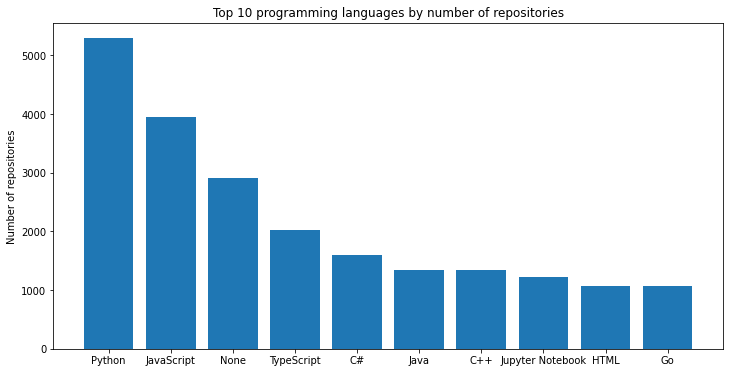

In [27]:
# Define the number of top languages to return, get the results, and plot them
num_results = 10
lang_repos = sort_results(language_stats, 'num_repos', num_results)
plot_result(lang_repos, 
          title=f'Top {len(lang_repos)} programming languages by number of repositories', 
          xlabel='', ylabel='Number of repositories')

# 2. Repositories with most commits

In [28]:
top_repos = my_pulsar.get_top_commits(20)

2022-06-04 04:09:59.707 INFO  [139956788725504] HandlerBase:64 | [persistent://public/static/initialized, reader-6f79c388e2, 6] Getting connection from pool
2022-06-04 04:09:59.709 INFO  [139956788725504] ConsumerImpl:224 | [persistent://public/static/initialized, reader-6f79c388e2, 6] Created consumer on broker [127.0.0.1:35230 -> 127.0.0.1:6650] 
2022-06-04 04:09:59.715 INFO  [139957752592192] ConsumerImpl:999 | [persistent://public/static/initialized, reader-6f79c388e2, 6] Closing consumer for topic persistent://public/static/initialized
2022-06-04 04:09:59.716 INFO  [139957752592192] ConsumerImpl:1055 | [persistent://public/static/initialized, reader-6f79c388e2, 6] Closed consumer 6

*** Showing partial results up to 2021-03-07 (info is still being processed) ***

2022-06-04 04:09:59.718 INFO  [139956788725504] HandlerBase:64 | [persistent://public/static/2021-03-07_result_commit, reader-542d14a66a, 7] Getting connection from pool
2022-06-04 04:09:59.720 INFO  [139956788725504] Con

In [29]:
pd.DataFrame(top_repos, columns=['Repository name','Number of commits'])

,Repository name,Number of commits
0,LineageOS/android_kernel_oneplus_sm8250,846325
1,feschenko/feschenko,790869
2,SamarV-121/android_kernel_realme_RMX2001,722349
3,CloudedQuartz/kernel_xiaomi_sdm845_wip,720743
4,AOSP-Krypton/frameworks_base,661920
5,leaningtech/cheerp-compiler,423988
6,llvm-mos/llvm-mos,421998
7,Status-Plus/StatusPlus,396098
8,GiorgioComitini/COVID-19,107359
9,dirtyfilthy/darktails,98205


# 3. Top languages with testdriven approach

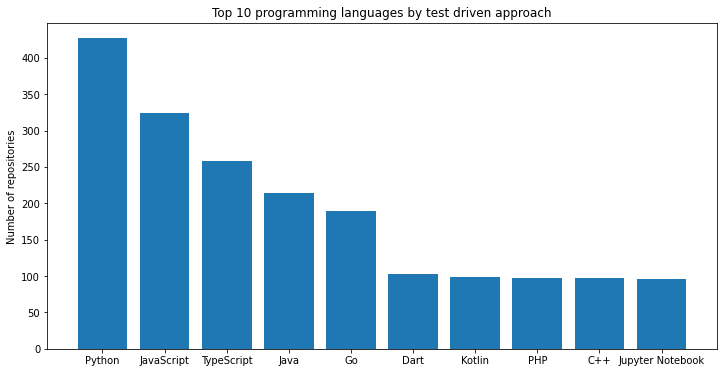

In [30]:
# Define the number of top languages to return, get the results, and plot them
num_results_test = 10
lang_repos_test = sort_results(language_stats, 'num_tests', num_results_test)
plot_result(lang_repos_test, 
          title=f'Top {len(lang_repos_test)} programming languages by test driven approach', 
          xlabel='', ylabel='Number of repositories')

# 4. Top languages with testdriven approach and continous integration

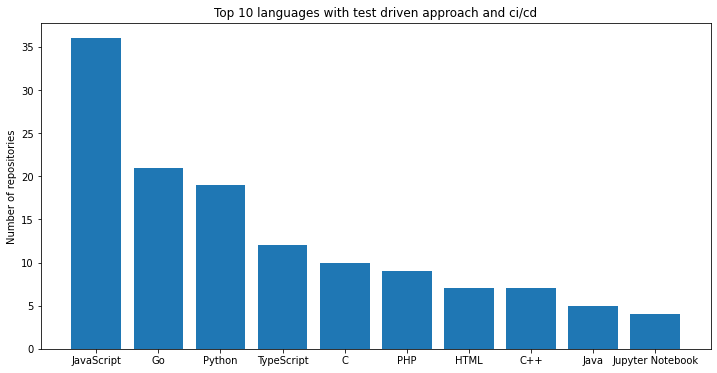

In [31]:
# Define the number of top languages to return, get the results, and plot them
num_results_ci = 10
lang_repos_ci = sort_results(language_stats, 'num_ci', num_results_ci)
plot_result(lang_repos_ci, 
          title=f'Top {len(lang_repos_ci)} languages with test driven approach and ci/cd', 
          xlabel='', ylabel='Number of repositories')

In [32]:
my_pulsar.close()

2022-06-04 04:10:16.463 INFO  [139957752592192] ClientImpl:496 | Closing Pulsar client with 3 producers and 8 consumers
2022-06-04 04:10:16.465 INFO  [139957752592192] ClientConnection:1559 | [127.0.0.1:35230 -> 127.0.0.1:6650] Connection closed
2022-06-04 04:10:16.466 INFO  [139957752592192] ClientConnection:263 | [127.0.0.1:35230 -> 127.0.0.1:6650] Destroyed connection
